# Spotify API Project

API (Application Programming Interface) es una tecnología que posibilita la comunicación entre dos aplicaciones (usuario-servidor, back-front, vista-servicio, etc) para compartir información y funcionalidades. Así, en la comunicación, a la aplicación que envía la solicitud se llama cliente y la que envía la respuesta se llama servidor.


In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [2]:
# After downloading the library and loading the environment variables,
# we can start working by initiating the API connection:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [10]:
# In this case I have chosen gyrofield. 
# First we get her ID by searching for her Spotify page and getting it from the URI. 
# Now, we perform the search for her top 10 songs.

artist_id = "2yKb2sD6dystFr0tTmSu2X"

response = con.artist_top_tracks("2yKb2sD6dystFr0tTmSu2X")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

  # k stands for the keys of the dictionary ("name", "popularity", "duration_ms"), 
  # and v stands for the corresponding values associated with those keys in each track dictionary.

In [11]:
# Once we have modified the answer, we create the Pandas DataFrame from it: 

import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

tracks_df.head()

,duration_ms,name,popularity
9,4.229883,Tech Flex VIP,20
7,4.352933,Fallen In Deep,22
8,4.251383,Midnight Minus One,22
6,5.220833,Oligarch,28
5,5.455550,Maybes,29


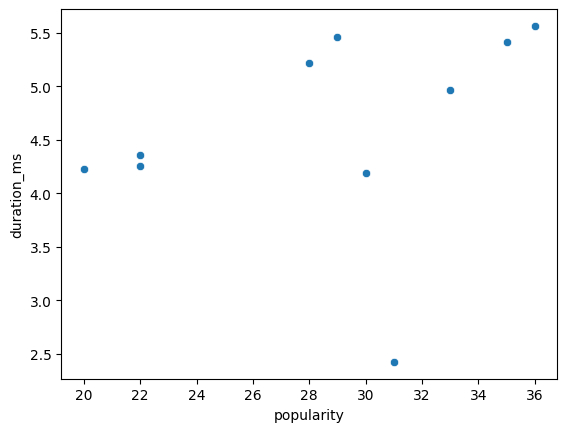

In [5]:
# A scatter plot is a good alternative to determine visually and graphically 
# whether two variables may or may not be related to each other:

import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")